In [2]:
# Setting the environment variable to address the OpenMP runtime conflict
import os

os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import keras

In [15]:
def plot_dynamic(history, metric):
    """
    Plot the training and validation metric over epochs.

    Parameters:
    history (keras.callbacks.History): The history object returned by the fit method of a Keras model.
    metric (str): The metric to plot. This should be a valid metric name available in the history object.

    Returns:
    None
    """

    train_metric = history.history[metric]
    validation_metric = history.history["val_" + metric]

    epochs = range(1, len(train_metric) + 1)

    plt.plot(epochs, train_metric)
    plt.plot(epochs, validation_metric)

    plt.title("Training and Validation " + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_" + metric, "validation_" + metric])

    plt.show()

In [4]:
def pltLerningRate(history):
    """
    Plot the learning rate over epochs.

    Args:
        history (History): The history object returned by the `fit` method of a Keras model.

    Returns:
        None
    """
    learning_rate = history.history["lr"]
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title("Learning rate")
    plt.xlabel("Epochs")
    plt.ylabel("Learning rate")
    plt.show()
    
    
def pltConfusionMatrix(model, x_test, y_test):
    """
    Plot the confusion matrix of the model.

    Parameters:
    model (keras.models.Model): The trained model.
    x_test (numpy.ndarray): The test data.
    y_test (numpy.ndarray): The test labels.

    Returns:
    None
    """

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)

    confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

    plt.imshow(confusion_matrix, cmap="binary")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()

In [5]:
# import mnist dataset from keras
from keras.datasets import mnist

# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


def mnist_model(input_shape=(28, 28, 1)):
    model = Sequential(
        [
            Conv2D(28, (3, 3), activation="relu", input_shape=input_shape),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation="relu"),
            Dropout(0.2),
            Dense(10, activation="softmax"),
        ]
    )
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [7]:
model = mnist_model(input_shape=(28, 28, 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [8]:
from keras.callbacks import EarlyStopping

In [9]:
early_stopping = EarlyStopping()
history_early_stopping = model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping],
    batch_size=32,
    verbose=2,
)

Epoch 1/10
1500/1500 - 13s - loss: 0.8582 - accuracy: 0.8407 - val_loss: 0.1399 - val_accuracy: 0.9647 - 13s/epoch - 8ms/step
Epoch 2/10
1500/1500 - 13s - loss: 0.1821 - accuracy: 0.9473 - val_loss: 0.1055 - val_accuracy: 0.9720 - 13s/epoch - 8ms/step


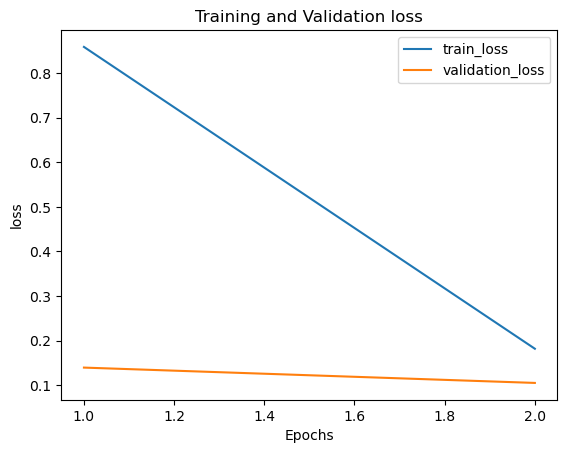

In [16]:
plot_dynamic(history_early_stopping, "loss")

In [11]:
model = mnist_model(input_shape=(28, 28, 1))

early_stopping_v2 = EarlyStopping(
    patience=2, monitor="val_loss", min_delta=0.01, mode="auto"
)

history_early_stopping_v2 = model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stopping_v2],
    batch_size=32,
    verbose=2,
)

Epoch 1/10
1500/1500 - 17s - loss: 0.8605 - accuracy: 0.8473 - val_loss: 0.1417 - val_accuracy: 0.9601 - 17s/epoch - 11ms/step
Epoch 2/10
1500/1500 - 15s - loss: 0.1645 - accuracy: 0.9525 - val_loss: 0.0946 - val_accuracy: 0.9745 - 15s/epoch - 10ms/step
Epoch 3/10
1500/1500 - 13s - loss: 0.1108 - accuracy: 0.9670 - val_loss: 0.0813 - val_accuracy: 0.9773 - 13s/epoch - 9ms/step
Epoch 4/10
1500/1500 - 11s - loss: 0.0885 - accuracy: 0.9724 - val_loss: 0.0883 - val_accuracy: 0.9772 - 11s/epoch - 8ms/step
Epoch 5/10
1500/1500 - 13s - loss: 0.0778 - accuracy: 0.9762 - val_loss: 0.0801 - val_accuracy: 0.9793 - 13s/epoch - 8ms/step


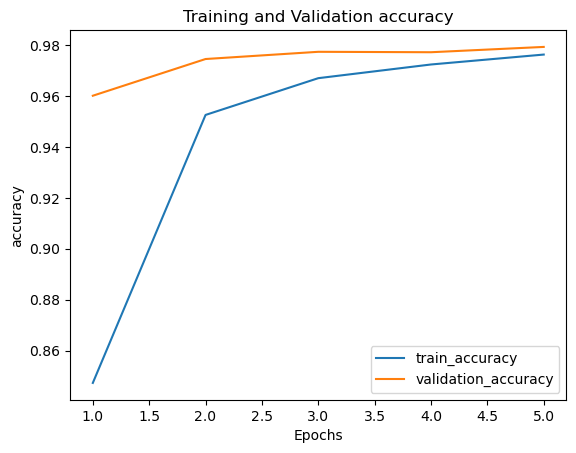

In [18]:
plot_dynamic(history_early_stopping_v2, "accuracy")

In [19]:
from keras.callbacks import CSVLogger

csv = CSVLogger("./logs/training.log")

model = mnist_model(input_shape=(28, 28, 1))

history_csv_logger = model.fit(
    x_train,
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[csv],
    batch_size=32,
    verbose=2,
)

Epoch 1/10
1500/1500 - 16s - loss: 0.8142 - accuracy: 0.8671 - val_loss: 0.1282 - val_accuracy: 0.9660 - 16s/epoch - 11ms/step
Epoch 2/10
1500/1500 - 19s - loss: 0.1664 - accuracy: 0.9524 - val_loss: 0.0919 - val_accuracy: 0.9734 - 19s/epoch - 13ms/step
Epoch 3/10
1500/1500 - 15s - loss: 0.1135 - accuracy: 0.9663 - val_loss: 0.0892 - val_accuracy: 0.9765 - 15s/epoch - 10ms/step
Epoch 4/10
1500/1500 - 18s - loss: 0.0892 - accuracy: 0.9730 - val_loss: 0.0893 - val_accuracy: 0.9778 - 18s/epoch - 12ms/step
Epoch 5/10
1500/1500 - 16s - loss: 0.0675 - accuracy: 0.9790 - val_loss: 0.1170 - val_accuracy: 0.9760 - 16s/epoch - 10ms/step
Epoch 6/10
1500/1500 - 16s - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0985 - val_accuracy: 0.9799 - 16s/epoch - 11ms/step
Epoch 7/10
1500/1500 - 16s - loss: 0.0523 - accuracy: 0.9844 - val_loss: 0.0930 - val_accuracy: 0.9791 - 16s/epoch - 11ms/step
Epoch 8/10
1500/1500 - 16s - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0882 - val_accuracy: 0.9815 - 16s/ep

In [23]:
import pandas as pd

df = pd.read_csv("./logs/training.log", index_col="epoch")

In [24]:
df

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.867125,0.814220,0.966000,0.128205
1,0.952396,0.166438,0.973417,0.091853
2,0.966313,0.113484,0.976500,0.089214
3,0.972979,0.089203,0.977833,0.089327
4,0.979000,0.067518,0.976000,0.117004
5,0.982229,0.058009,0.979917,0.098470
6,0.984375,0.052261,0.979083,0.092964
7,0.984667,0.049503,0.981500,0.088221
8,0.987688,0.041075,0.980583,0.105700


In [25]:
from keras.callbacks import ModelCheckpoint

check_point = ModelCheckpoint(
    filepath="./models/model_{epoch}.h5",
    save_best_only=True,
    save_weights_only=True,
    verbose=1,
)

model = mnist_model(input_shape=(28, 28, 1))

history_check_point = model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[check_point],
    batch_size=32,
    verbose=2,
)


Epoch 1/10

Epoch 1: val_loss improved from inf to 0.15218, saving model to ./models\model_1.h5
1500/1500 - 15s - loss: 0.7635 - accuracy: 0.8654 - val_loss: 0.1522 - val_accuracy: 0.9588 - 15s/epoch - 10ms/step
Epoch 2/10

Epoch 2: val_loss improved from 0.15218 to 0.09972, saving model to ./models\model_2.h5
1500/1500 - 15s - loss: 0.1640 - accuracy: 0.9511 - val_loss: 0.0997 - val_accuracy: 0.9739 - 15s/epoch - 10ms/step
Epoch 3/10

Epoch 3: val_loss did not improve from 0.09972
1500/1500 - 17s - loss: 0.1126 - accuracy: 0.9669 - val_loss: 0.1042 - val_accuracy: 0.9731 - 17s/epoch - 11ms/step
Epoch 4/10

Epoch 4: val_loss improved from 0.09972 to 0.08294, saving model to ./models\model_4.h5
1500/1500 - 12s - loss: 0.0910 - accuracy: 0.9725 - val_loss: 0.0829 - val_accuracy: 0.9774 - 12s/epoch - 8ms/step
Epoch 5/10

Epoch 5: val_loss did not improve from 0.08294
1500/1500 - 11s - loss: 0.0713 - accuracy: 0.9787 - val_loss: 0.1127 - val_accuracy: 0.9759 - 11s/epoch - 8ms/step
Epoch 6/

In [26]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss", factor=0.2, patience=2, min_lr=0.001, verbose=2
)

model = mnist_model(input_shape=(28, 28, 1))

history_reduce_lr = model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[reduce_lr],
    batch_size=32,
    verbose=2,
)


Epoch 1/20
1500/1500 - 17s - loss: 0.5979 - accuracy: 0.8867 - val_loss: 0.1310 - val_accuracy: 0.9658 - lr: 0.0010 - 17s/epoch - 11ms/step
Epoch 2/20
1500/1500 - 18s - loss: 0.1359 - accuracy: 0.9601 - val_loss: 0.0921 - val_accuracy: 0.9734 - lr: 0.0010 - 18s/epoch - 12ms/step
Epoch 3/20
1500/1500 - 16s - loss: 0.0966 - accuracy: 0.9715 - val_loss: 0.0946 - val_accuracy: 0.9754 - lr: 0.0010 - 16s/epoch - 11ms/step
Epoch 4/20
1500/1500 - 17s - loss: 0.0736 - accuracy: 0.9779 - val_loss: 0.0994 - val_accuracy: 0.9767 - lr: 0.0010 - 17s/epoch - 11ms/step
Epoch 5/20
1500/1500 - 12s - loss: 0.0690 - accuracy: 0.9791 - val_loss: 0.1015 - val_accuracy: 0.9758 - lr: 0.0010 - 12s/epoch - 8ms/step
Epoch 6/20
1500/1500 - 12s - loss: 0.0542 - accuracy: 0.9830 - val_loss: 0.0920 - val_accuracy: 0.9811 - lr: 0.0010 - 12s/epoch - 8ms/step
Epoch 7/20
1500/1500 - 12s - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.1089 - val_accuracy: 0.9790 - lr: 0.0010 - 12s/epoch - 8ms/step
Epoch 8/20
1500/1500 - 

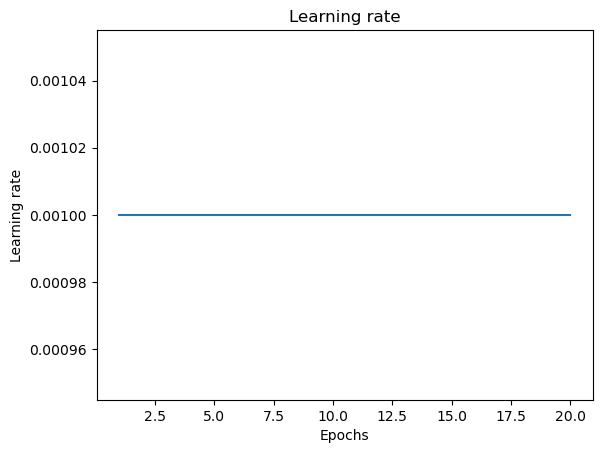

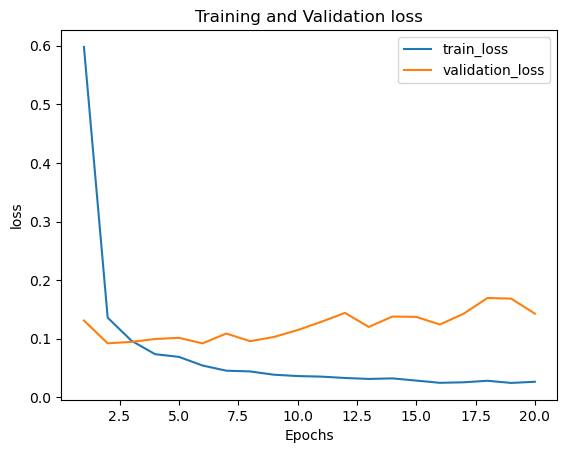

In [27]:
pltLerningRate(history_reduce_lr)

plot_dynamic(history_reduce_lr, "loss")

In [29]:
# scheduler function
from keras.callbacks import LearningRateScheduler
from keras import backend as ops

def scheduler(epoch, lr):
     if epoch < 10:
         return lr
     else:
         return lr * ops.exp(-0.1)
     

lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

model = mnist_model(input_shape=(28, 28, 1))

history_lr_scheduler = model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=20,
    validation_split=0.2,
    callbacks=[lr_scheduler],
    batch_size=32,
    verbose=2,
)



Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/20
1500/1500 - 17s - loss: 0.6843 - accuracy: 0.8917 - val_loss: 0.1304 - val_accuracy: 0.9638 - lr: 0.0010 - 17s/epoch - 12ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/20
1500/1500 - 18s - loss: 0.1446 - accuracy: 0.9578 - val_loss: 0.0988 - val_accuracy: 0.9743 - lr: 0.0010 - 18s/epoch - 12ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/20
1500/1500 - 19s - loss: 0.1031 - accuracy: 0.9691 - val_loss: 0.0853 - val_accuracy: 0.9766 - lr: 0.0010 - 19s/epoch - 12ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 4/20
1500/1500 - 20s - loss: 0.0789 - accuracy: 0.9755 - val_loss: 0.0946 - val_accuracy: 0.9768 - lr: 0.0010 - 20s/epoch - 14ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 5/20
1500/1500 - 15s - loss: 0.067

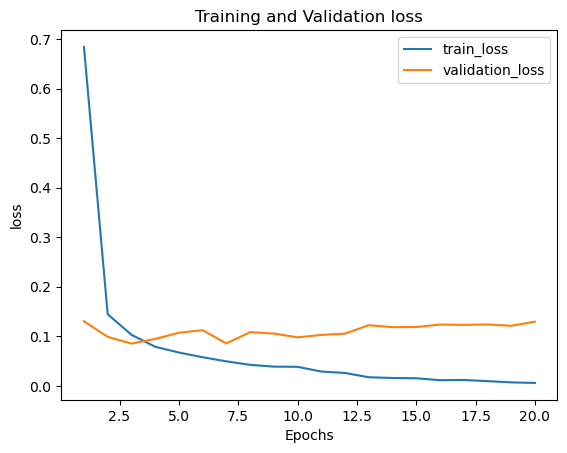

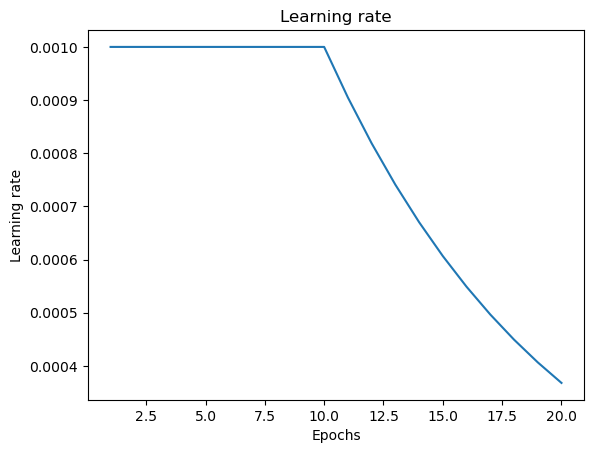

In [30]:
plot_dynamic(history_lr_scheduler, "loss")
pltLerningRate(history_lr_scheduler)

In [31]:
from keras.callbacks import TensorBoard
import time

time = time.strftime("%Y-%m-%d_%H-%M-%S")

tensorboard = TensorBoard(
    log_dir="./logs/tensorboard/{}".format(time), histogram_freq=1
)

model = mnist_model(input_shape=(28, 28, 1))

history_tensorboard = model.fit(
    x_train[..., np.newaxis],
    y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[tensorboard],
    batch_size=32,
    verbose=2,
)

Epoch 1/10
1500/1500 - 20s - loss: 0.9273 - accuracy: 0.8592 - val_loss: 0.1523 - val_accuracy: 0.9572 - 20s/epoch - 14ms/step
Epoch 2/10
1500/1500 - 17s - loss: 0.1649 - accuracy: 0.9532 - val_loss: 0.1043 - val_accuracy: 0.9712 - 17s/epoch - 11ms/step
Epoch 3/10
1500/1500 - 19s - loss: 0.1211 - accuracy: 0.9644 - val_loss: 0.0999 - val_accuracy: 0.9726 - 19s/epoch - 13ms/step
Epoch 4/10
1500/1500 - 12s - loss: 0.0923 - accuracy: 0.9727 - val_loss: 0.1075 - val_accuracy: 0.9739 - 12s/epoch - 8ms/step
Epoch 5/10
1500/1500 - 12s - loss: 0.0751 - accuracy: 0.9778 - val_loss: 0.0925 - val_accuracy: 0.9769 - 12s/epoch - 8ms/step
Epoch 6/10
1500/1500 - 12s - loss: 0.0616 - accuracy: 0.9816 - val_loss: 0.0873 - val_accuracy: 0.9807 - 12s/epoch - 8ms/step
Epoch 7/10
1500/1500 - 12s - loss: 0.0502 - accuracy: 0.9848 - val_loss: 0.0959 - val_accuracy: 0.9802 - 12s/epoch - 8ms/step
Epoch 8/10
1500/1500 - 12s - loss: 0.0493 - accuracy: 0.9851 - val_loss: 0.0909 - val_accuracy: 0.9808 - 12s/epoch 

In [32]:
print("tensorboard --logdir=./logs/tensorboard/{}".format(time))

tensorboard --logdir=./logs/tensorboard/2024-04-20_13-25-37
